# Telco Customer Churn

#### LogBook

In [32]:
#  21 Oct 2022   >>>   Project Start
#  23 Oct 2022   >>>   Project End

# Author: Andres Montes de Oca
# GitHub: https://github.com/AndresMontesDeOca
# Competition #02 (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

#### Load Data and Info

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.max_columns', None)

data = pd.read_csv('Data/data.csv')

print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Categorical Features

In [3]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

#### SeniorCitizen

In [4]:
# Converting 1 to True and 0 to False
data['SeniorCitizen'] = data['SeniorCitizen'].astype(bool)

#### Category Cast

In [5]:
# Converting dtype to Category
data[categorical_cols] = data[categorical_cols].astype('category')

#### Plots

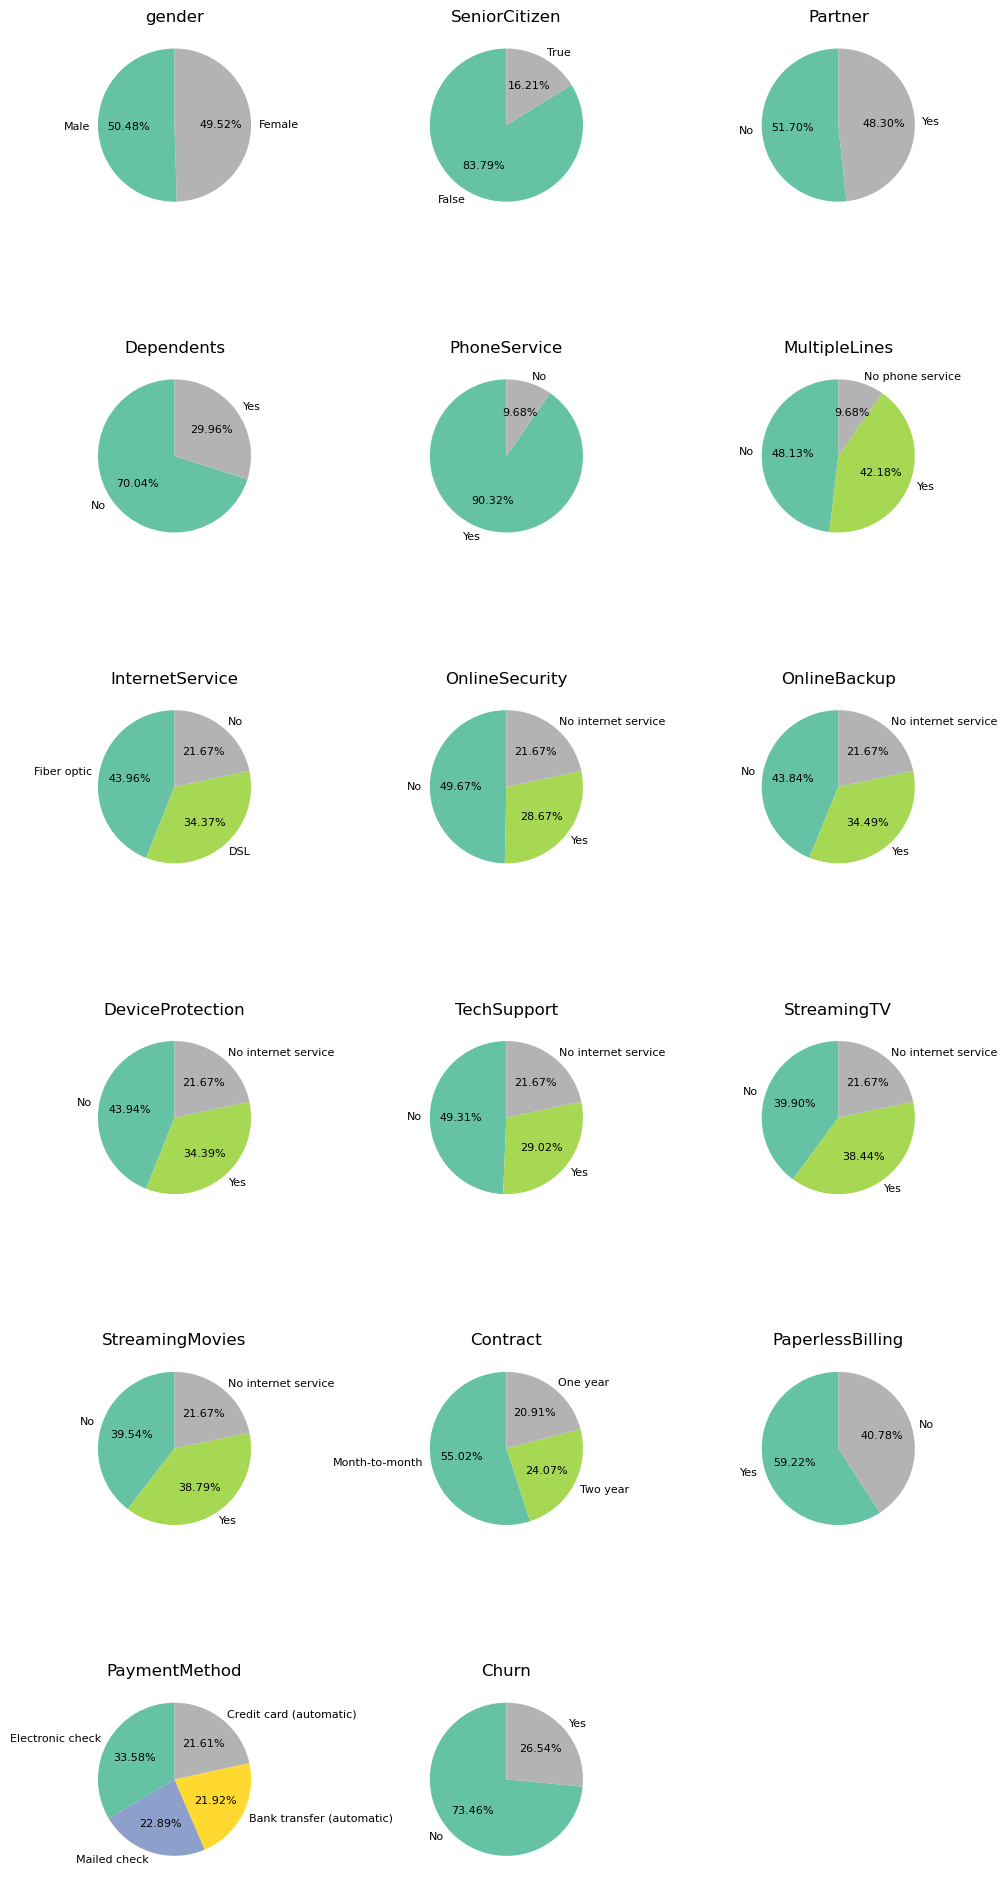

In [6]:
# To draw the right number of subplots
columns = 3
rows = int(np.ceil(len(categorical_cols)/columns))
fig = plt.figure(figsize=(10, 20))

# Plot
for i, column_name in enumerate(categorical_cols):
    ax = fig.add_subplot(rows, columns, i+1)
    data[column_name].value_counts(True).plot(kind='pie', autopct='%.2f%%', # explode not working
                        textprops={'fontsize':8}, startangle=90, cmap='Set2').set_title(column_name)
                                                                                       
    ax.set_ylabel('')

# Asthetics    
fig.tight_layout()
plt.show()


# Discrete Features

In [7]:
discrete_cols = ['tenure']

#### Tenure (CountPlot)

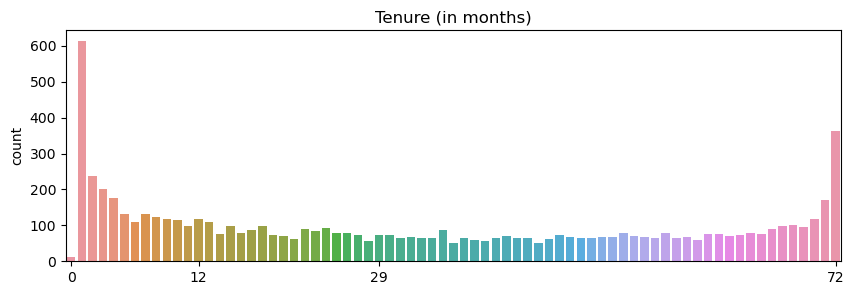

In [8]:
# Set x_ticks values and labels
x_ticks = [0, 12, data[discrete_cols]['tenure'].median(), data[discrete_cols]['tenure'].max()]

fig = plt.figure(figsize=(10, 3))
sns.countplot(x=data[discrete_cols]['tenure']).set_title('Tenure (in months)')
plt.xlabel('')
plt.xticks(x_ticks)
plt.show()

# Problem on the first six months
# Even though it is an Ordinal feature, an histogram is the best way to show it. Too 

# Continuous Features

In [9]:
continuous_cols = ['MonthlyCharges', 'TotalCharges']

#### TotalCharges Cast to Numeric

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Not Numbers replaced for Nulls
print('Nulls deleted:', data.TotalCharges.isnull().sum())

# Nulls drop??
data.dropna(subset='TotalCharges', inplace=True)

Nulls deleted: 11


#### Plots

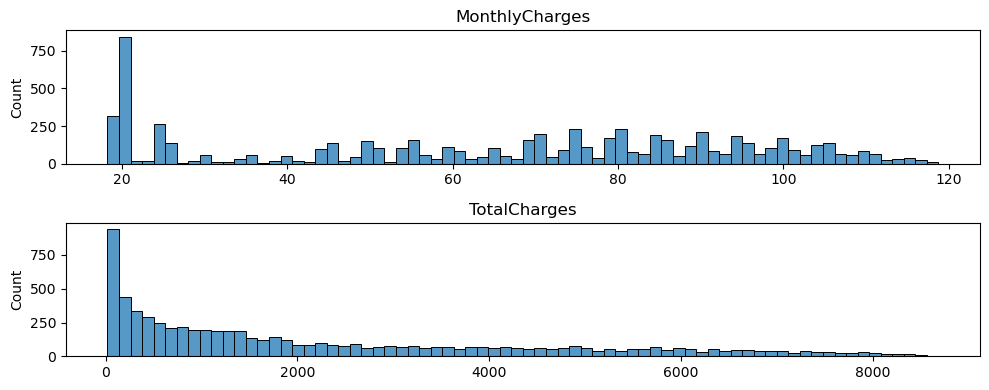

In [11]:
# To draw the right number of subplots
rows = len(continuous_cols)

fig = plt.figure(figsize=(10, 4)) # Explore about this

for i, column_name in enumerate(continuous_cols):
    ax = fig.add_subplot(rows, 1, i+1)
    sns.histplot(data=data[column_name], bins=72).set_title(column_name)
    ax.set_xlabel('')
    
fig.tight_layout()
plt.show()

# Feature Engineering

## Churn (Target)

In [12]:
from sklearn.preprocessing import LabelEncoder

y = pd.Series(LabelEncoder().fit_transform(data.Churn.astype('category')), name='Churn')

In [13]:
nominal_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', \
           'StreamingMovies',  'PaperlessBilling', 'OnlineBackup']

In [14]:
# Generic Functions
from sklearn.preprocessing import OneHotEncoder

def onehot_encoding(data_):
    oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse=False).fit(data_)
    result = pd.DataFrame(oh_encoder.transform(data_), columns=oh_encoder.get_feature_names_out())
    return result

#### 'No internet service' Problem

In [15]:
# Lets replace 'No internet service' for 'No' in all impacted Features
no_internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 
                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col_name in no_internet_service_cols:
    data.loc[data[col_name]=='No internet service', col_name] = 'No'

#### PaymentMethod Cardinality

In [16]:
print(data.PaymentMethod.value_counts())

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


#### PaymentMethod (OneHot Encoder)

In [17]:
# Big ccardinality
# print(data.PaymentMethod.value_counts())

data_PaymentMethod_oh = onehot_encoding(data['PaymentMethod'].to_frame())
print(data_PaymentMethod_oh.shape)

(7032, 4)


#### PaymentMethod (LabelEncoder)

In [18]:
from sklearn.preprocessing import LabelEncoder

data_PaymentMethod_label= pd.Series(LabelEncoder().fit_transform(data['PaymentMethod']), name='PaymentMethod')
print(data_PaymentMethod_label.shape)

(7032,)


## OneHot Encoder

In [19]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse=False).fit(data[nominal_cols])

data_nominals = pd.DataFrame(oh_encoder.transform(data[nominal_cols]), columns=oh_encoder.get_feature_names_out())

print(data_nominals.shape)

(7032, 11)


## Ordinal Encoder

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['MultipleLines', 'InternetService', 'Contract']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
data_ordinals = pd.DataFrame()

for col_name in ordinal_cols:
    ordinal_serie = pd.Series(ordinal_encoder.fit_transform(data[col_name].to_frame())\
                              .flatten(), name=col_name)
    data_ordinals = pd.concat([data_ordinals, ordinal_serie], axis=1)
    
print(data_ordinals.shape)

(7032, 3)


## Continuous Features

In [21]:
continuous_cols = ['MonthlyCharges', 'TotalCharges']

# Skew values before Transformation

# Around 0 should be Normal
print('TotalCharges:', data.TotalCharges.skew())
print('MonthlyCharges:', data.MonthlyCharges.skew(), '\n')

# P-Value 
print('Shapiro TotalCharges:', st.shapiro(data.TotalCharges)[1])
print('Shapiro MonthlyCharges:', st.shapiro(data.MonthlyCharges)[1], '\n')

# P-Value as well?
print('TotalCharges:', st.skewtest(data.TotalCharges)[1])
print('MonthlyCharges:', st.skewtest(data.MonthlyCharges)[1])

TotalCharges: 0.9616424997242504
MonthlyCharges: -0.22210292770166232 

Shapiro TotalCharges: 0.0
Shapiro MonthlyCharges: 0.0 

TotalCharges: 6.136087231949993e-173
MonthlyCharges: 5.49834222192266e-14


C:\Users\andre\anaconda3\envs\Kaggle\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### BoxCox

Skew:
 MonthlyCharges   -0.145758
TotalCharges     -0.145758
dtype: float64 

Mean:
 MonthlyCharges    20.749319
TotalCharges      20.749319
dtype: float64
(7032, 2)


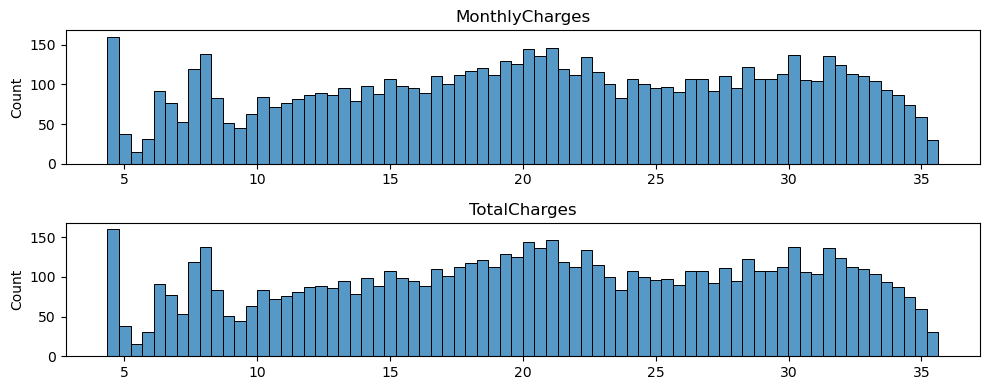

In [22]:
data_continuous_boxcox = pd.DataFrame()

for col_name in continuous_cols:
    continuous_serie = pd.Series(st.boxcox(data[column_name])[0], name=col_name)
    data_continuous_boxcox = pd.concat([data_continuous_boxcox, continuous_serie], axis=1)
    
# Skew value of transformed data
print('Skew:\n', data_continuous_boxcox.skew(), '\n')
print('Mean:\n', data_continuous_boxcox.mean())
print(data_continuous_boxcox.shape)


fig = plt.figure(figsize=(10, 4)) # Explore about this

for i, column_name in enumerate(continuous_cols):
    ax = fig.add_subplot(rows, 1, i+1)
    sns.histplot(data=data_continuous_boxcox[column_name], bins=72).set_title(column_name)
    ax.set_xlabel('')
    
fig.tight_layout()
plt.show()

### Standard Scaler

Skew:
 MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64 

Mean:
 MonthlyCharges    9.652878e-17
TotalCharges     -1.172113e-16
dtype: float64
(7032, 2)


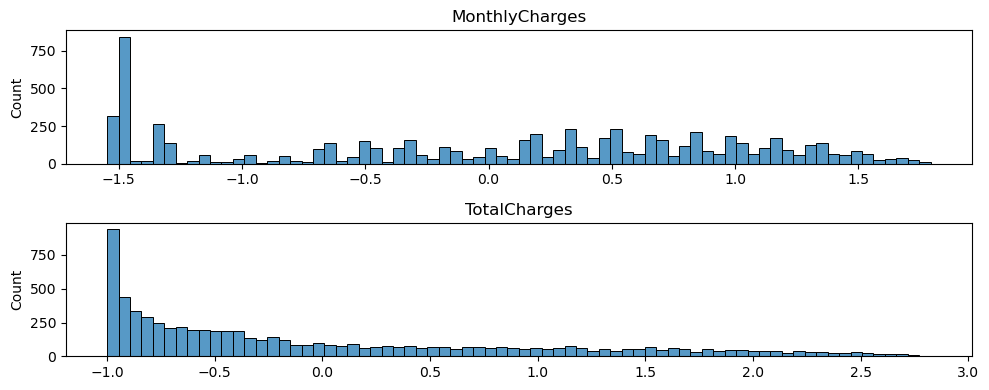

In [23]:
from sklearn.preprocessing import StandardScaler

data_continuous_stdscaler = pd.DataFrame()

for col_names in continuous_cols:
    continuous_serie = pd.Series(StandardScaler().fit_transform(data[col_names].to_frame()).flatten(), name=col_names)
    data_continuous_stdscaler = pd.concat([data_continuous_stdscaler, continuous_serie], axis=1)

print('Skew:\n', data_continuous_stdscaler.skew(), '\n')
print('Mean:\n', data_continuous_stdscaler.mean())
print(data_continuous_stdscaler.shape)


fig = plt.figure(figsize=(10, 4)) # Explore about this

for i, column_name in enumerate(continuous_cols):
    ax = fig.add_subplot(rows, 1, i+1)
    sns.histplot(data=data_continuous_stdscaler[column_name], bins=72).set_title(column_name)
    ax.set_xlabel('')
    
fig.tight_layout()
plt.show()

# Shape doesn't change, just the scale

# Discrete Features

In [24]:
discrete_cols = ['tenure']

data_discrete = data[discrete_cols]

# Nothing to do here

# Correlation Analysis

In [25]:
data_cols = [y, data_discrete, data_nominals, data_ordinals, data_PaymentMethod_label, data_continuous_boxcox]

# data_continuous_stdscaler reduce the performance
# data_PaymentMethod_oh reduce the performance too

# Lets create the final DataFrame
# Dont know why there are 11 nulls
data_FINAL = pd.concat(data_cols, axis=1)

print(data_FINAL.isnull().sum())
data_FINAL.dropna(inplace=True)
print(data_FINAL.shape)

Churn                   11
tenure                  11
gender_Male             11
SeniorCitizen_True      11
Partner_Yes             11
Dependents_Yes          11
OnlineSecurity_Yes      11
DeviceProtection_Yes    11
TechSupport_Yes         11
StreamingTV_Yes         11
StreamingMovies_Yes     11
PaperlessBilling_Yes    11
OnlineBackup_Yes        11
MultipleLines           11
InternetService         11
Contract                11
PaymentMethod           11
MonthlyCharges          11
TotalCharges            11
dtype: int64
(7021, 19)


#### Correlation Matrix

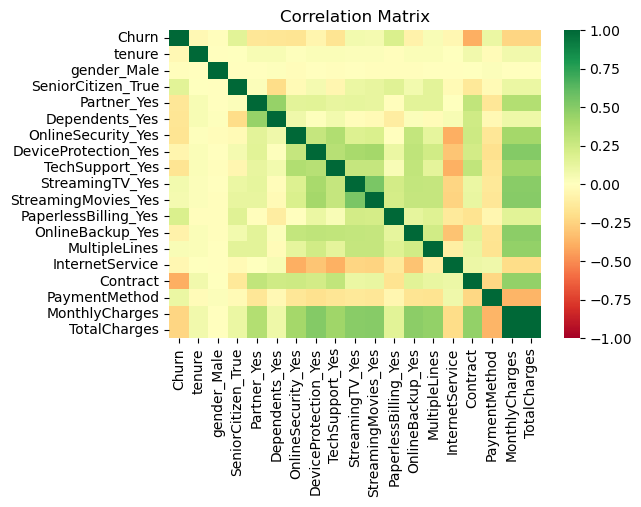

In [26]:
fig = plt.figure(figsize=(6, 4))
sns.heatmap(data_FINAL.corr(), vmin=-1, vmax=1, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

#### Feature Selection

In [27]:
# Drop Features from data_FINAL to test

data_FINAL.drop(columns=['StreamingMovies_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
                        'OnlineBackup_Yes', 'TotalCharges'], inplace=True)

# Basic Modeling

In [31]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(data_FINAL.drop(columns='Churn'), data_FINAL.Churn)

# !pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score

model_lazy = LazyClassifier()
models, predictions = model_lazy.fit(Xtrain, Xtest, ytrain, ytest)
display(models.sort_values(by='Accuracy', ascending=False))


100%|██████████| 29/29 [00:06<00:00,  4.26it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.70,0.70,0.79,0.08
AdaBoostClassifier,0.80,0.69,0.69,0.79,0.18
SVC,0.79,0.67,0.67,0.77,1.16
RandomForestClassifier,0.78,0.68,0.68,0.77,0.41
NuSVC,0.78,0.63,0.63,0.75,1.27
XGBClassifier,0.78,0.68,0.68,0.77,0.28
BaggingClassifier,0.77,0.66,0.66,0.76,0.10
LogisticRegression,0.77,0.64,0.64,0.75,0.02
CalibratedClassifierCV,0.77,0.64,0.64,0.75,0.45
